# Predict A Doctor's Consultation Fee 

We have all been in situation where we go to a doctor in emergency and find that the consultation fees are too high. We have data that records important details about a doctor and you get to build a model to predict the doctor’s consulting fee.?

Size of training set: 5961 records

Size of test set: 1987 records

# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Train Dataset

In [3]:
df=pd.read_excel("Final_Train.xlsx")
df

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33 years experience,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100


In [4]:
#checking dimension
df.shape

(5961, 7)

In [5]:
df.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info', 'Fees'],
      dtype='object')

FEATURES:

Qualification: Qualification and degrees held by the doctor

Experience: Experience of the doctor in number of years

Rating: Rating given by patients

Profile: Type of the doctor

Miscellaneous_Info: Extra information about the doctor

Fees: Fees charged by the doctor (Target Variable)

Place: Area and the city where the doctor is located.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


In [7]:
df.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
Fees                   int64
dtype: object

# Checking Null Values

In [8]:
df.isnull()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,True,False,False,True,False
3,False,False,True,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
5956,False,False,False,False,False,False,False
5957,False,False,True,False,False,True,False
5958,False,False,False,False,False,False,False
5959,False,False,False,False,False,False,False


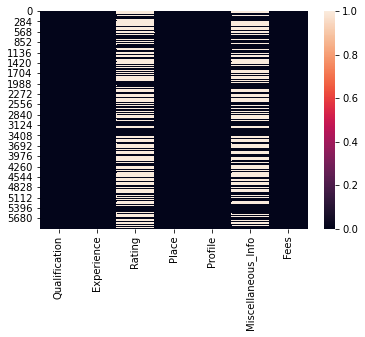

In [9]:
sns.heatmap(df.isnull())

In [10]:
df.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

# Data analysis

In [11]:
df['Rating']=df['Rating'].fillna('100%')

In [12]:
df

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,100%,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,100%,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33 years experience,100%,"Nungambakkam, Chennai",General Medicine,NaN,100
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100


In [13]:
df['Rating']=df['Rating'].str[0:-1].astype(float)

In [14]:
df['Rating']=df['Rating']/10

In [15]:
df

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,10.0,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,9.8,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,10.0,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,10.0,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,10.0,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,9.8,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33 years experience,10.0,"Nungambakkam, Chennai",General Medicine,NaN,100
5958,MBBS,41 years experience,9.7,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,"MBBS, MD - General Medicine",15 years experience,9.0,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100


Now we convert rating column to 1 10 10

In [16]:
df['Experience']=df['Experience'].apply(lambda x:int(x.split(' ')[0]))

We convert Exprience column to integer with meaningfull information

In [17]:
df['city']=df['Place'].str.split(',').str[1]

In [18]:
df['locality']=df['Place'].str.split(',').str[0]

In [19]:
df['city'].unique()

array([' Ernakulam', ' Bangalore', ' Chennai', ' Delhi', ' Hyderabad',
       ' Coimbatore', ' Mumbai', ' Thiruvananthapuram', nan, ' Sector 5'],
      dtype=object)

In [20]:
df=df.drop('Place',axis=1)
df

,Qualification,Experience,Rating,Profile,Miscellaneous_Info,Fees,city,locality
0,"BHMS, MD - Homeopathy",24,10.0,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Ernakulam,Kakkanad
1,"BAMS, MD - Ayurveda Medicine",12,9.8,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Bangalore,Whitefield
2,"MBBS, MS - Otorhinolaryngology",9,10.0,ENT Specialist,NaN,300,Bangalore,Mathikere - BEL
3,"BSc - Zoology, BAMS",12,10.0,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bangalore,Bannerghatta Road
4,BAMS,20,10.0,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Chennai,Keelkattalai
...,...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19,9.8,ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300,Bangalore,Basavanagudi
5957,MBBS,33,10.0,General Medicine,NaN,100,Chennai,Nungambakkam
5958,MBBS,41,9.7,General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600,Delhi,Greater Kailash Part 2
5959,"MBBS, MD - General Medicine",15,9.0,General Medicine,General Medical Consultation Viral Fever Treat...,100,Mumbai,Vileparle West


In [21]:
df.city.value_counts()

 Bangalore             1258
 Mumbai                1219
 Delhi                 1184
 Hyderabad              951
 Chennai                855
 Coimbatore             228
 Ernakulam              153
 Thiruvananthapuram      86
 Sector 5                 1
Name: city, dtype: int64

In [22]:
df['city'].unique()

array([' Ernakulam', ' Bangalore', ' Chennai', ' Delhi', ' Hyderabad',
       ' Coimbatore', ' Mumbai', ' Thiruvananthapuram', nan, ' Sector 5'],
      dtype=object)

In [23]:
df[df['city']==' Sector 5']

,Qualification,Experience,Rating,Profile,Miscellaneous_Info,Fees,city,locality
2169,BDS,11,10.0,Dentist,NaN,250,Sector 5,Dwarka


In [24]:
df.isnull().sum()

Qualification            0
Experience               0
Rating                   0
Profile                  0
Miscellaneous_Info    2620
Fees                     0
city                    26
locality                25
dtype: int64

In [25]:
df['city']=df['city'].replace(' Sector 5','unknown')

In [26]:
df['city']=df['city'].fillna('missing')

In [27]:
df[df['city']=='missing']

,Qualification,Experience,Rating,Profile,Miscellaneous_Info,Fees,city,locality
91,Get inspired by remarkable stories of people l...,0,10.0,Dermatologists,NaN,100,missing,NaN
502,Get inspired by remarkable stories of people l...,0,10.0,Dermatologists,NaN,100,missing,NaN
599,Get inspired by remarkable stories of people l...,0,10.0,Dermatologists,NaN,100,missing,NaN
605,Get inspired by remarkable stories of people l...,0,10.0,Dermatologists,NaN,100,missing,NaN
724,Get inspired by remarkable stories of people l...,0,10.0,Dermatologists,NaN,100,missing,NaN
1002,Get inspired by remarkable stories of people l...,0,10.0,Dermatologists,NaN,100,missing,NaN
1083,Get inspired by remarkable stories of people l...,0,10.0,Dermatologists,NaN,100,missing,NaN
1210,Get inspired by remarkable stories of people l...,0,10.0,Dermatologists,NaN,100,missing,NaN
2078,Get inspired by remarkable stories of people l...,0,10.0,Dermatologists,NaN,100,missing,NaN
2178,Get inspired by remarkable stories of people l...,0,10.0,Dermatologists,NaN,100,missing,NaN


These are giving not a single information.so we drop it

In [28]:
df.loc[3980,:]

Qualification             BDS
Experience                 23
Rating                     10
Profile               Dentist
Miscellaneous_Info        NaN
Fees                      250
city                  missing
locality                    e
Name: 3980, dtype: object

In [29]:
df=df.drop(3980,axis=0)
df

,Qualification,Experience,Rating,Profile,Miscellaneous_Info,Fees,city,locality
0,"BHMS, MD - Homeopathy",24,10.0,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Ernakulam,Kakkanad
1,"BAMS, MD - Ayurveda Medicine",12,9.8,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Bangalore,Whitefield
2,"MBBS, MS - Otorhinolaryngology",9,10.0,ENT Specialist,NaN,300,Bangalore,Mathikere - BEL
3,"BSc - Zoology, BAMS",12,10.0,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bangalore,Bannerghatta Road
4,BAMS,20,10.0,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Chennai,Keelkattalai
...,...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19,9.8,ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300,Bangalore,Basavanagudi
5957,MBBS,33,10.0,General Medicine,NaN,100,Chennai,Nungambakkam
5958,MBBS,41,9.7,General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600,Delhi,Greater Kailash Part 2
5959,"MBBS, MD - General Medicine",15,9.0,General Medicine,General Medical Consultation Viral Fever Treat...,100,Mumbai,Vileparle West


In [30]:
df[df['Qualification']=='Get inspired by remarkable stories of people like you']

,Qualification,Experience,Rating,Profile,Miscellaneous_Info,Fees,city,locality
91,Get inspired by remarkable stories of people l...,0,10.0,Dermatologists,NaN,100,missing,NaN
502,Get inspired by remarkable stories of people l...,0,10.0,Dermatologists,NaN,100,missing,NaN
599,Get inspired by remarkable stories of people l...,0,10.0,Dermatologists,NaN,100,missing,NaN
605,Get inspired by remarkable stories of people l...,0,10.0,Dermatologists,NaN,100,missing,NaN
724,Get inspired by remarkable stories of people l...,0,10.0,Dermatologists,NaN,100,missing,NaN
1002,Get inspired by remarkable stories of people l...,0,10.0,Dermatologists,NaN,100,missing,NaN
1083,Get inspired by remarkable stories of people l...,0,10.0,Dermatologists,NaN,100,missing,NaN
1210,Get inspired by remarkable stories of people l...,0,10.0,Dermatologists,NaN,100,missing,NaN
2078,Get inspired by remarkable stories of people l...,0,10.0,Dermatologists,NaN,100,missing,NaN
2178,Get inspired by remarkable stories of people l...,0,10.0,Dermatologists,NaN,100,missing,NaN


These 25 rows are giving not a single information.so we drop it.

In [31]:
#df=df.dropna()
df.isnull().sum()

Qualification            0
Experience               0
Rating                   0
Profile                  0
Miscellaneous_Info    2619
Fees                     0
city                     0
locality                25
dtype: int64

Null values are removed from the dataset

Miscellaneous_Info is to much messy column and it consist the data which we already have like doctor address(city & area) and Rating
area and city are approximate have same meaning as well as relationship so better to move with only city
so drop the Miscellaneous_Info 

In [32]:
df=df.drop('Miscellaneous_Info',axis=1)
df

,Qualification,Experience,Rating,Profile,Fees,city,locality
0,"BHMS, MD - Homeopathy",24,10.0,Homeopath,100,Ernakulam,Kakkanad
1,"BAMS, MD - Ayurveda Medicine",12,9.8,Ayurveda,350,Bangalore,Whitefield
2,"MBBS, MS - Otorhinolaryngology",9,10.0,ENT Specialist,300,Bangalore,Mathikere - BEL
3,"BSc - Zoology, BAMS",12,10.0,Ayurveda,250,Bangalore,Bannerghatta Road
4,BAMS,20,10.0,Ayurveda,250,Chennai,Keelkattalai
...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19,9.8,ENT Specialist,300,Bangalore,Basavanagudi
5957,MBBS,33,10.0,General Medicine,100,Chennai,Nungambakkam
5958,MBBS,41,9.7,General Medicine,600,Delhi,Greater Kailash Part 2
5959,"MBBS, MD - General Medicine",15,9.0,General Medicine,100,Mumbai,Vileparle West


In [33]:
df.groupby('city')['locality'].nunique()

city
 Bangalore             153
 Chennai               124
 Coimbatore             48
 Delhi                 200
 Ernakulam              52
 Hyderabad             135
 Mumbai                115
 Thiruvananthapuram     48
missing                  0
unknown                  1
Name: locality, dtype: int64

We may drop locality column

In [34]:
df=df.drop('locality',axis=1)

In [35]:
df

,Qualification,Experience,Rating,Profile,Fees,city
0,"BHMS, MD - Homeopathy",24,10.0,Homeopath,100,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",12,9.8,Ayurveda,350,Bangalore
2,"MBBS, MS - Otorhinolaryngology",9,10.0,ENT Specialist,300,Bangalore
3,"BSc - Zoology, BAMS",12,10.0,Ayurveda,250,Bangalore
4,BAMS,20,10.0,Ayurveda,250,Chennai
...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19,9.8,ENT Specialist,300,Bangalore
5957,MBBS,33,10.0,General Medicine,100,Chennai
5958,MBBS,41,9.7,General Medicine,600,Delhi
5959,"MBBS, MD - General Medicine",15,9.0,General Medicine,100,Mumbai


#  Visualization and Checking relationship with Target Variable

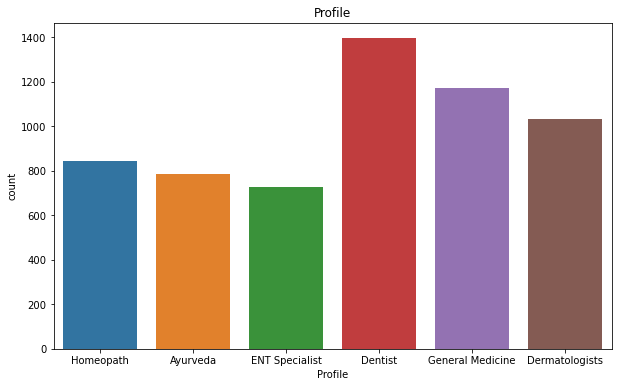

Dentist             1396
General Medicine    1173
Dermatologists      1034
Homeopath            843
Ayurveda             786
ENT Specialist       728
Name: Profile, dtype: int64


In [36]:
plt.figure(figsize=(10,6))
sns.countplot(x='Profile',data=df)
plt.title('Profile')
plt.show()
print(df['Profile'].value_counts())

Most doctor's are dentist

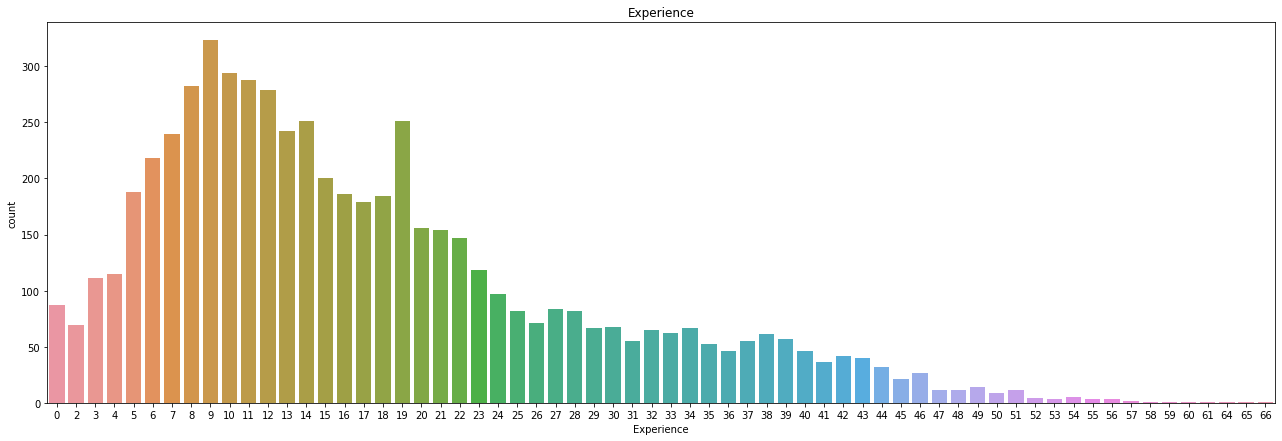

9     323
10    294
11    288
8     282
12    279
     ... 
64      1
65      1
58      1
66      1
61      1
Name: Experience, Length: 64, dtype: int64


In [37]:
plt.figure(figsize=(22,7))
sns.countplot(x='Experience',data=df)
plt.title('Experience')
plt.show()
print(df['Experience'].value_counts())

most doctors have exprience between 5 to 25 years.

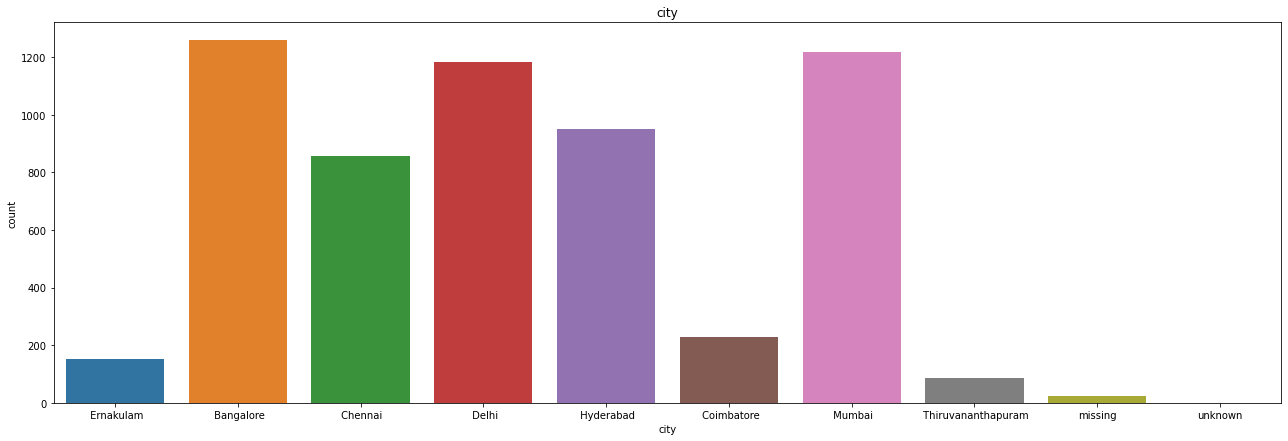

 Bangalore             1258
 Mumbai                1219
 Delhi                 1184
 Hyderabad              951
 Chennai                855
 Coimbatore             228
 Ernakulam              153
 Thiruvananthapuram      86
missing                  25
unknown                   1
Name: city, dtype: int64


In [38]:
plt.figure(figsize=(22,7))
sns.countplot(x='city',data=df)
plt.title('city')
plt.show()
print(df['city'].value_counts())

Most of the doctors are from bangalore

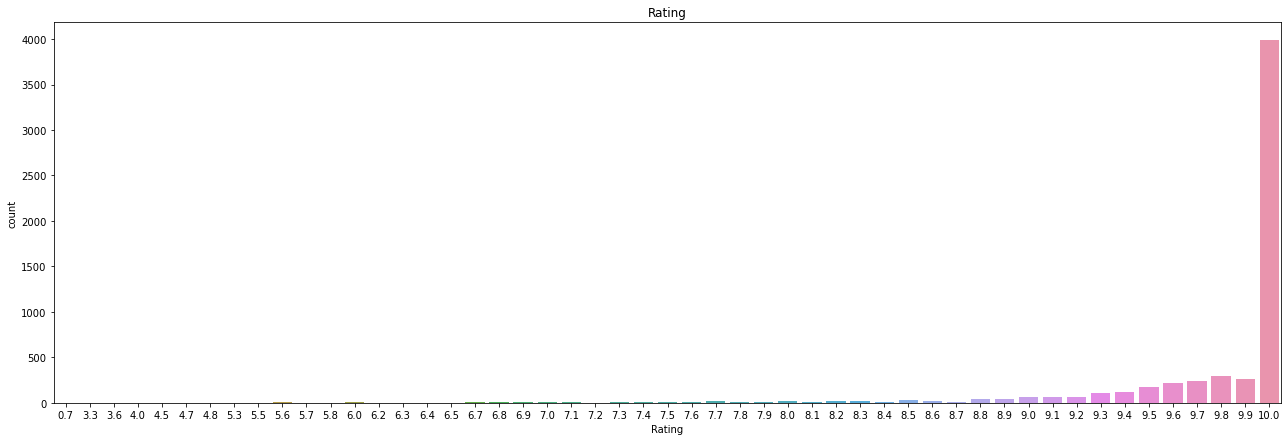

10.0    3985
9.8      290
9.9      259
9.7      241
9.6      220
9.5      178
9.4      115
9.3      109
9.0       66
9.2       66
9.1       60
8.9       42
8.8       41
8.5       27
8.2       23
8.3       21
8.6       21
8.0       19
7.7       16
8.7       14
7.9       13
8.4       13
8.1       12
6.7       12
7.6        9
7.1        9
7.3        8
7.5        8
7.4        7
6.0        7
7.8        6
5.6        5
6.8        5
7.0        4
6.9        4
7.2        3
5.7        3
6.4        2
3.3        2
6.2        2
5.5        2
6.3        2
4.8        1
4.7        1
0.7        1
6.5        1
3.6        1
4.0        1
4.5        1
5.3        1
5.8        1
Name: Rating, dtype: int64


In [39]:
plt.figure(figsize=(22,7))
sns.countplot(x='Rating',data=df)
plt.title('Rating')
plt.show()
print(df['Rating'].value_counts())

All doctor's  are good because they have good ratings

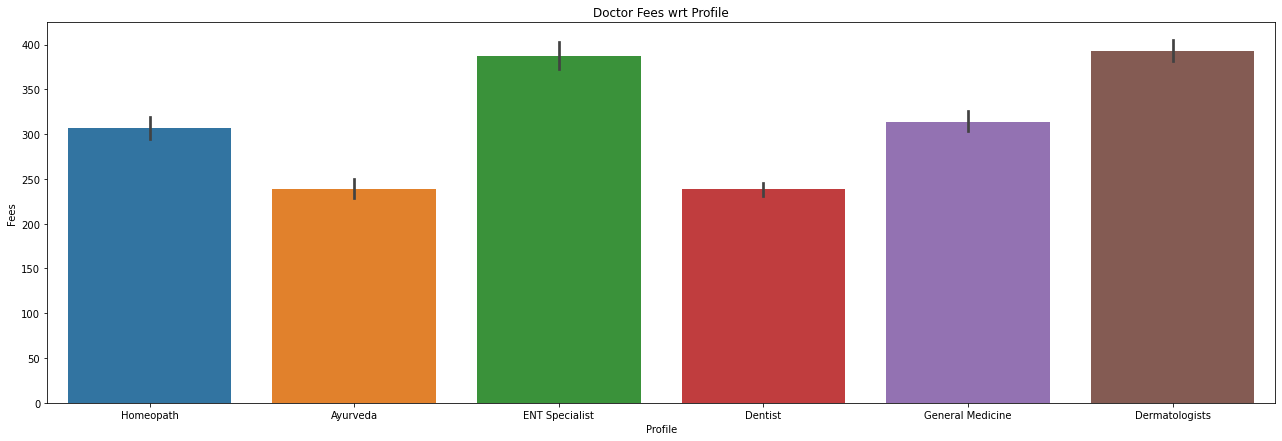

In [40]:
plt.figure(figsize=(22,7))
sns.barplot(x='Profile',y='Fees',data=df)
plt.title("Doctor Fees wrt Profile")
plt.show()

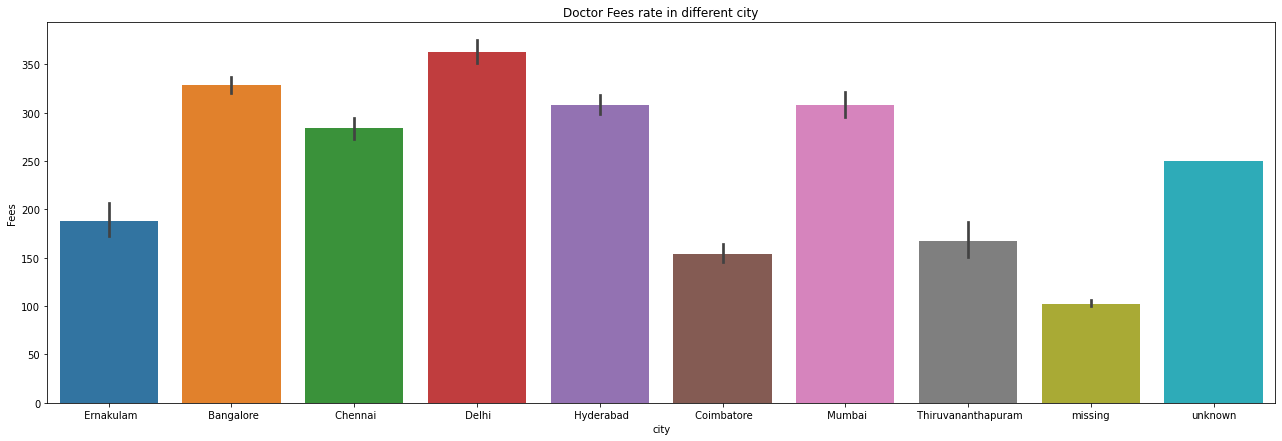

In [41]:
plt.figure(figsize=(22,7))
sns.barplot(x='city',y='Fees',data=df)
plt.title("Doctor Fees rate in different city")
plt.show()

Observation

In Delhi, Banglore, Hyderabad, Mumbai and Chennai the doctor consultation fees are high as compared to other.

Doctor's fee of ENT Specialist and Dermatologist is very high than all. Homeopath and Genral medicine are at same level.

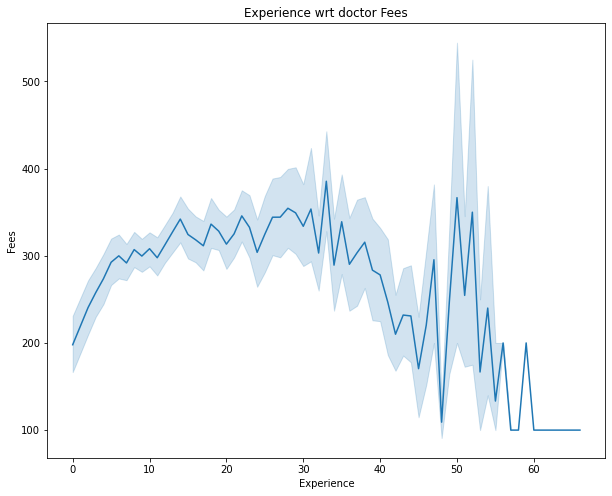

In [42]:
plt.figure(figsize=(10,8))
ax = sns.lineplot(x='Experience',y='Fees',data=df)
ax.set_title("Experience wrt doctor Fees")
plt.show()

From exprience 30 to 35 years doctor's charge is high.it doesnot seem exprience is so much related to exprience

We have to make labelencoding of catagorical vcolumns

In [43]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [44]:
df['city']=le.fit_transform(df['city'])

In [45]:
df['Profile']=le.fit_transform(df['Profile'])

In [46]:
df

,Qualification,Experience,Rating,Profile,Fees,city
0,"BHMS, MD - Homeopathy",24,10.0,5,100,4
1,"BAMS, MD - Ayurveda Medicine",12,9.8,0,350,0
2,"MBBS, MS - Otorhinolaryngology",9,10.0,3,300,0
3,"BSc - Zoology, BAMS",12,10.0,0,250,0
4,BAMS,20,10.0,0,250,1
...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19,9.8,3,300,0
5957,MBBS,33,10.0,4,100,1
5958,MBBS,41,9.7,4,600,3
5959,"MBBS, MD - General Medicine",15,9.0,4,100,6


# Checking Corelation with Target variable

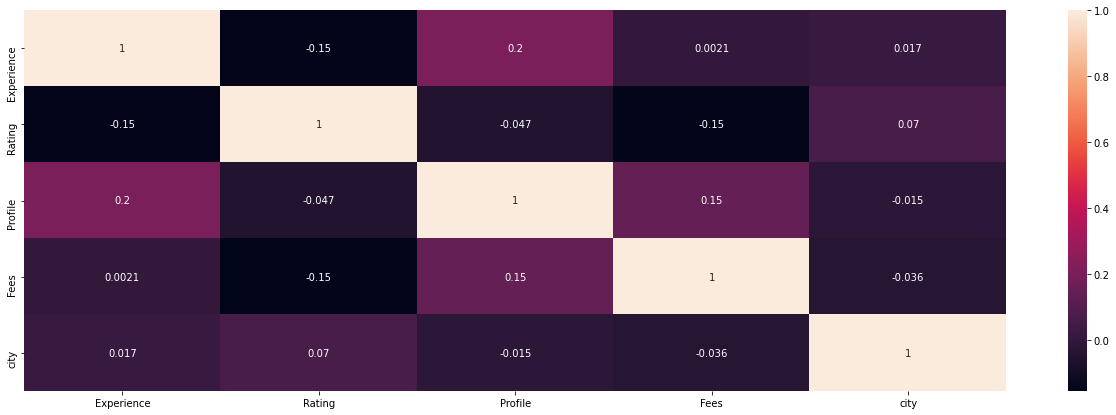

In [47]:
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),annot=True)
plt.show()

Observation:

Profile is positively correlated with Fees whereas Rating is negatively correlated.

Qualification column is so much messy.so we have to make in such a way that it looks simpler

In [48]:
df['Qualification'].value_counts()

BDS                                                                                                             487
BHMS                                                                                                            477
BAMS                                                                                                            471
MBBS                                                                                                            334
MBBS, MS - ENT                                                                                                  220
                                                                                                               ... 
BDS, PhD - Orthodontics & Dentofacial Orthopaedics, Fellowship and Diplomate in Implantology from ICOI (USA)      1
MDS - Prosthodontics, BDS, Certificate in Cosmetic Dentistry                                                      1
MD - Dermatology, Diploma in Dermatology                                

In [49]:
df['Qualifications']=df['Qualification'].apply(lambda x:x.split(',')[0])

In [50]:
df['Qualifications'].unique()

array(['BHMS', 'BAMS', 'MBBS', 'BSc - Zoology', 'BDS', 'BSc', 'MDS',
       'Diploma in Dermatology', 'DM - Neurology', 'MD - Homeopathy',
       'MDS - Prosthodontist And Crown Bridge',
       'MDS - Oral & Maxillofacial Surgery',
       'MDS - Periodontology and Oral Implantology', 'MD - Dermatology',
       'MDS-Oral Pathology and Oral Microbiology', 'MD - Dermatology ',
       'Get inspired by remarkable stories of people like you',
       'PhD - Orthodontics & Dentofacial Orthopaedics', 'MRCPS',
       'MDS - Conservative Dentistry & Endodontics',
       'MD - Ayurveda Medicine', 'MS - General Surgery', 'DDVL',
       'MD - General Medicine',
       'DHMS (Diploma in Homeopathic Medicine and Surgery)', 'MS - ENT',
       'MD - Internal Medicine', 'GCEH', 'MS - Otorhinolaryngology',
       'Post Graduate Diploma in Healthcare Management(PGDHM)',
       'DNB - Paediatrics', 'Certification in Aesthetic Dentistry',
       'Fellowship In Laryngology Bronchoesophagology', 'FAGE',
      

In [51]:
df['Qualifications']=df['Qualifications'].replace('BSc - Zoology','BAMS')

In [52]:
df['Qualifications']=df['Qualifications'].replace('MD - Dermatology ','MD - Dermatology')

We take top 10 most unique values and encoding it

In [53]:
df['Qualifications'].value_counts().head(10)

MBBS                                                  2448
BDS                                                   1207
BAMS                                                   712
BHMS                                                   706
MD - Dermatology                                       146
MS - ENT                                                71
MD - Homeopathy                                         56
MD - Ayurveda Medicine                                  38
DHMS (Diploma in Homeopathic Medicine and Surgery)      36
MD - General Medicine                                   26
Name: Qualifications, dtype: int64

In [54]:
x1=df[df['Qualifications']=='MBBS']

In [55]:
x2=df[df['Qualifications']=='BDS']

In [56]:
x3=df[df['Qualifications']=='BAMS']

In [57]:
x4=df[df['Qualifications']=='BHMS']

In [58]:
x5=df[df['Qualifications']=='MD - Dermatology']

In [59]:
x6=df[df['Qualifications']=='MS - ENT']

In [60]:
x7=df[df['Qualifications']=='MD - Homeopathy']

In [61]:
x8=df[df['Qualifications']=='MD - Ayurveda Medicine']

In [62]:
x9=df[df['Qualifications']=='DHMS (Diploma in Homeopathic Medicine and Surgery)']

In [63]:
x10=df[df['Qualifications']=='MD - General Medicine']

In [64]:
df_new1=pd.concat([x1,x2,x3,x4,x5,x6,x7,x8,x9,x10],axis=0)
df_new1

,Qualification,Experience,Rating,Profile,Fees,city,Qualifications
2,"MBBS, MS - Otorhinolaryngology",9,10.0,3,300,0,MBBS
8,"MBBS, MD - General Medicine",14,10.0,4,100,5,MBBS
10,"MBBS, MS, DNB - ENT",5,10.0,3,700,1,MBBS
14,"MBBS, Diploma in Otorhinolaryngology (DLO), DN...",12,10.0,3,500,3,MBBS
15,"MBBS, MD - General Medicine",10,10.0,4,200,5,MBBS
...,...,...,...,...,...,...,...
4507,"MD - General Medicine, BAMS, Diploma In Naturo...",6,10.0,0,100,3,MD - General Medicine
4897,"MD - General Medicine, PG in Diabetology (USA)...",9,10.0,4,400,0,MD - General Medicine
5029,"MD - General Medicine, MBBS",48,9.5,4,100,3,MD - General Medicine
5250,"MD - General Medicine, DM - Nephrology, MBBS",6,10.0,4,900,3,MD - General Medicine


In [65]:
df=df_new1

In [66]:
df=df.sort_index()

In [67]:
df

,Qualification,Experience,Rating,Profile,Fees,city,Qualifications
0,"BHMS, MD - Homeopathy",24,10.0,5,100,4,BHMS
1,"BAMS, MD - Ayurveda Medicine",12,9.8,0,350,0,BAMS
2,"MBBS, MS - Otorhinolaryngology",9,10.0,3,300,0,MBBS
3,"BSc - Zoology, BAMS",12,10.0,0,250,0,BAMS
4,BAMS,20,10.0,0,250,1,BAMS
...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19,9.8,3,300,0,MBBS
5957,MBBS,33,10.0,4,100,1,MBBS
5958,MBBS,41,9.7,4,600,3,MBBS
5959,"MBBS, MD - General Medicine",15,9.0,4,100,6,MBBS


In [68]:
x1=pd.get_dummies(df.Qualifications)

In [69]:
df=pd.concat([df,x1],axis=1)
df

,Qualification,Experience,Rating,Profile,Fees,city,Qualifications,BAMS,BDS,BHMS,DHMS (Diploma in Homeopathic Medicine and Surgery),MBBS,MD - Ayurveda Medicine,MD - Dermatology,MD - General Medicine,MD - Homeopathy,MS - ENT
0,"BHMS, MD - Homeopathy",24,10.0,5,100,4,BHMS,0,0,1,0,0,0,0,0,0,0
1,"BAMS, MD - Ayurveda Medicine",12,9.8,0,350,0,BAMS,1,0,0,0,0,0,0,0,0,0
2,"MBBS, MS - Otorhinolaryngology",9,10.0,3,300,0,MBBS,0,0,0,0,1,0,0,0,0,0
3,"BSc - Zoology, BAMS",12,10.0,0,250,0,BAMS,1,0,0,0,0,0,0,0,0,0
4,BAMS,20,10.0,0,250,1,BAMS,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19,9.8,3,300,0,MBBS,0,0,0,0,1,0,0,0,0,0
5957,MBBS,33,10.0,4,100,1,MBBS,0,0,0,0,1,0,0,0,0,0
5958,MBBS,41,9.7,4,600,3,MBBS,0,0,0,0,1,0,0,0,0,0
5959,"MBBS, MD - General Medicine",15,9.0,4,100,6,MBBS,0,0,0,0,1,0,0,0,0,0


In [70]:
df

,Qualification,Experience,Rating,Profile,Fees,city,Qualifications,BAMS,BDS,BHMS,DHMS (Diploma in Homeopathic Medicine and Surgery),MBBS,MD - Ayurveda Medicine,MD - Dermatology,MD - General Medicine,MD - Homeopathy,MS - ENT
0,"BHMS, MD - Homeopathy",24,10.0,5,100,4,BHMS,0,0,1,0,0,0,0,0,0,0
1,"BAMS, MD - Ayurveda Medicine",12,9.8,0,350,0,BAMS,1,0,0,0,0,0,0,0,0,0
2,"MBBS, MS - Otorhinolaryngology",9,10.0,3,300,0,MBBS,0,0,0,0,1,0,0,0,0,0
3,"BSc - Zoology, BAMS",12,10.0,0,250,0,BAMS,1,0,0,0,0,0,0,0,0,0
4,BAMS,20,10.0,0,250,1,BAMS,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19,9.8,3,300,0,MBBS,0,0,0,0,1,0,0,0,0,0
5957,MBBS,33,10.0,4,100,1,MBBS,0,0,0,0,1,0,0,0,0,0
5958,MBBS,41,9.7,4,600,3,MBBS,0,0,0,0,1,0,0,0,0,0
5959,"MBBS, MD - General Medicine",15,9.0,4,100,6,MBBS,0,0,0,0,1,0,0,0,0,0


Now we may drop Both qualification column

In [71]:
df=df.drop('Qualification',axis=1)

In [72]:
df['Fees'].unique()

array([100, 350, 300, 250, 200, 700, 500, 400, 150, 650, 600,  50, 800,
       750, 450,  80,  60, 550, 900, 950, 430, 130, 630, 499, 260,  70,
        10, 299, 230, 380,   5, 280,  40,  30, 180, 920, 125, 850,  20,
       220], dtype=int64)

fees like 5,10,20,30,40 are not possible.so we may drop  it

In [73]:
df[df['Fees']<50]

,Experience,Rating,Profile,Fees,city,Qualifications,BAMS,BDS,BHMS,DHMS (Diploma in Homeopathic Medicine and Surgery),MBBS,MD - Ayurveda Medicine,MD - Dermatology,MD - General Medicine,MD - Homeopathy,MS - ENT
1316,4,10.0,0,10,6,BAMS,1,0,0,0,0,0,0,0,0,0
1930,6,10.0,1,5,7,BDS,0,1,0,0,0,0,0,0,0,0
2248,22,10.0,5,40,6,BHMS,0,0,1,0,0,0,0,0,0,0
2459,37,10.0,0,40,6,BAMS,1,0,0,0,0,0,0,0,0,0
2563,35,10.0,0,30,0,MD - Ayurveda Medicine,0,0,0,0,0,1,0,0,0,0
3303,3,10.0,1,10,4,BDS,0,1,0,0,0,0,0,0,0,0
3499,45,10.0,0,30,6,BAMS,1,0,0,0,0,0,0,0,0,0
4290,15,10.0,0,30,5,BAMS,1,0,0,0,0,0,0,0,0,0
4748,44,10.0,4,20,5,MBBS,0,0,0,0,1,0,0,0,0,0
5703,9,10.0,0,30,6,BAMS,1,0,0,0,0,0,0,0,0,0


In [74]:
df=df[df['Fees']>=50]

Though all columns catagorical so no need to do outlier removal and skewness removal

In [79]:
df=df.drop('Qualifications',axis=1)

Divide dataset into dependent and independent column for model building

In [80]:
x=df.drop('Fees',axis=1)
x

,Experience,Rating,Profile,city,BAMS,BDS,BHMS,DHMS (Diploma in Homeopathic Medicine and Surgery),MBBS,MD - Ayurveda Medicine,MD - Dermatology,MD - General Medicine,MD - Homeopathy,MS - ENT
0,24,10.0,5,4,0,0,1,0,0,0,0,0,0,0
1,12,9.8,0,0,1,0,0,0,0,0,0,0,0,0
2,9,10.0,3,0,0,0,0,0,1,0,0,0,0,0
3,12,10.0,0,0,1,0,0,0,0,0,0,0,0,0
4,20,10.0,0,1,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,19,9.8,3,0,0,0,0,0,1,0,0,0,0,0
5957,33,10.0,4,1,0,0,0,0,1,0,0,0,0,0
5958,41,9.7,4,3,0,0,0,0,1,0,0,0,0,0
5959,15,9.0,4,6,0,0,0,0,1,0,0,0,0,0


In [76]:
y=df['Fees']
y

0       100
1       350
2       300
3       250
4       250
       ... 
5956    300
5957    100
5958    600
5959    100
5960    200
Name: Fees, Length: 5436, dtype: int64

finding best random_state

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [82]:
maxrs=0
maxacc=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    acc=r2_score(y_test,y_pred)
    if acc>maxacc:
        maxacc=acc
        maxrs=i
print('best random_state',maxrs)

best random_state 178


In [83]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=178)

In [84]:
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from xgboost import XGBRegressor

In [85]:
ls=Lasso()
svr=SVR()
rd=Ridge()
els=ElasticNet()
ex=XGBRegressor()

In [86]:
model=[lr,ls,svr,rd,els,ex]

In [87]:
for i in model:
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    print(i)
    print(i.score(x_train,y_train))

LinearRegression()
0.11113442535351792
Lasso()
0.10396244174430991
SVR()
8.65335708830628e-05
Ridge()
0.11111812700255563
ElasticNet()
0.06023253150334695
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)
0.4973841937403599


Using ensemble algorithm

In [88]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
y_Pred=rf.predict(x_test)
acc=r2_score(y_test,y_pred)
print(rf.score(x_train,y_train))

0.6259209026933528


In [89]:
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor()
gb.fit(x_train,y_train)
y_Pred=gb.predict(x_test)
acc=r2_score(y_test,y_pred)
print(gb.score(x_train,y_train))

0.21971510565122154


In [90]:
from sklearn.ensemble import AdaBoostRegressor
ad=AdaBoostRegressor()
ad.fit(x_train,y_train)
y_Pred=ad.predict(x_test)
acc=r2_score(y_test,y_pred)
print(ad.score(x_train,y_train))

0.11870119103224241


RandomForestRegressor() has the highest Accuracy of 62.59%

# Hyperparametertuning  of RandomForestRegressor

In [91]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [92]:
param={'n_estimators':[10,50,100,200,500]}

In [93]:
rf=RandomForestRegressor()
gscv=GridSearchCV(rf,param)
gscv.fit(x,y)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'n_estimators': [10, 50, 100, 200, 500]})

In [94]:
print(gscv.best_params_)

{'n_estimators': 500}


In [95]:
gscv.best_estimator_

RandomForestRegressor(n_estimators=500)

In [96]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [97]:
rf=RandomForestRegressor(n_estimators=500)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
y_pred=rf.predict(x_test)
print("Score of Model is",rf.score(x_train,y_train))
print("Mean Absolute Error", mean_absolute_error(y_test,y_pred))
print("Root Mean Squared Error", (mean_squared_error(y_test,y_pred))**0.5 )

Score of Model is 0.6279434249428921
Mean Absolute Error 146.13779599957365
Root Mean Squared Error 188.87340277784836


after hyperparameter tuning my accuracy becomes 62.79%

# Loading Test Dataset

In [98]:
df1=pd.read_excel("Final_Test.xlsx")
df1

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...
...,...,...,...,...,...,...
1982,"BAMS, Doctor of Medicine",10 years experience,NaN,"Basavanagudi, Bangalore",Ayurveda,NaN
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4 years experience,NaN,"Choolai, Chennai",Dermatologists,NaN
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9 years experience,NaN,"Porur, Chennai",General Medicine,NaN
1985,BDS,12 years experience,98%,"Arekere, Bangalore",Dentist,RCT - Root Canal Treatment Root Canal Treatmen...


In [99]:
#checking Dimension
df1.shape

(1987, 6)

In [100]:
df1.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info'],
      dtype='object')

In [101]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       1987 non-null   object
 1   Experience          1987 non-null   object
 2   Rating              897 non-null    object
 3   Place               1981 non-null   object
 4   Profile             1987 non-null   object
 5   Miscellaneous_Info  1153 non-null   object
dtypes: object(6)
memory usage: 93.3+ KB


# Checking Null Values

In [102]:
df1.isnull().sum()

Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info     834
dtype: int64

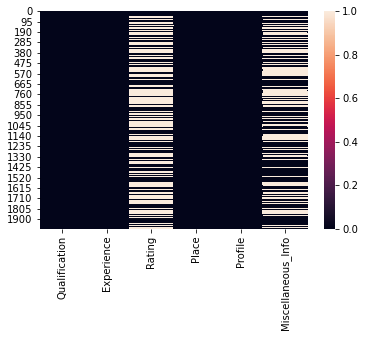

In [103]:
sns.heatmap(df1.isnull())

We have to remove null values either by filling or by droping

In [104]:
df1['Rating']=df['Rating'].fillna('100%')

In [105]:
df1['Rating'].unique()

array([10. ,  9.8,  9.9,  nan,  7.9,  9.5,  9.7,  9.4,  9. ,  8. ,  9.3,
        3.6,  7.8,  8.7,  9.6,  8.2,  8.9,  7.4,  8.6,  9.2,  8.3,  8.8,
        7.6,  5.6,  9.1,  6.8,  6. ,  8.5,  7.5,  6.9,  7.3,  6.7,  7.7,
        3.3,  5.5,  7.1,  8.4,  4.5,  6.3,  7.2,  8.1,  6.2,  5.7])

In [106]:
df1['Rating']=df1['Rating'].replace( np.nan,10.0)

In [107]:
df1.isnull().sum()

Qualification           0
Experience              0
Rating                  0
Place                   6
Profile                 0
Miscellaneous_Info    834
dtype: int64

We have to divide place in two column city and Locality

In [108]:
df1['city']=df1['Place'].str.split(',').str[1]

In [109]:
df1['locality']=df1['Place'].str.split(',').str[0]

Place column has missing value.We replace it by missing

In [110]:
df1['Place']=df1['Place'].fillna('missing')

In [111]:
df1[df1['Place']=='missing']

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,city,locality
381,Get inspired by remarkable stories of people l...,0 years experience,10.0,missing,Dermatologists,NaN,NaN,NaN
1494,Get inspired by remarkable stories of people l...,0 years experience,9.6,missing,Dermatologists,NaN,NaN,NaN
1644,Get inspired by remarkable stories of people l...,0 years experience,10.0,missing,Dermatologists,NaN,NaN,NaN
1838,Get inspired by remarkable stories of people l...,0 years experience,10.0,missing,Dermatologists,NaN,NaN,NaN
1925,Get inspired by remarkable stories of people l...,0 years experience,10.0,missing,Dermatologists,NaN,NaN,NaN
1930,Get inspired by remarkable stories of people l...,0 years experience,10.0,missing,Dermatologists,NaN,NaN,NaN


These rows are showing not a single information.so we drop it

In [112]:
df1.drop([381,1494,1644,1838,1925,1930],axis=0,inplace=True)

In [113]:
df1

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,city,locality
0,MBBS,35 years experience,10.0,"Ghatkopar East, Mumbai",General Medicine,NaN,Mumbai,Ghatkopar East
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,9.8,"West Marredpally, Hyderabad",ENT Specialist,NaN,Hyderabad,West Marredpally
2,"MBBS, DDVL",40 years experience,10.0,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai",Chennai,KK Nagar
3,BAMS,0 years experience,10.0,"New Ashok Nagar, Delhi",Ayurveda,NaN,Delhi,New Ashok Nagar
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,10.0,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...,Bangalore,Kanakpura Road
...,...,...,...,...,...,...,...,...
1982,"BAMS, Doctor of Medicine",10 years experience,10.0,"Basavanagudi, Bangalore",Ayurveda,NaN,Bangalore,Basavanagudi
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4 years experience,9.7,"Choolai, Chennai",Dermatologists,NaN,Chennai,Choolai
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9 years experience,10.0,"Porur, Chennai",General Medicine,NaN,Chennai,Porur
1985,BDS,12 years experience,8.4,"Arekere, Bangalore",Dentist,RCT - Root Canal Treatment Root Canal Treatmen...,Bangalore,Arekere


Miscellaneous_Info column has more nan values and we can get information from other column.so we drop it

In [114]:
df1.drop('Miscellaneous_Info',axis=1,inplace=True)

All null values are removed from the test dataset

Change Experience column to integer

In [115]:
df1['Experience']=df1['Experience'].apply(lambda x:int(x.split(' ')[0]))

In [116]:
df1

,Qualification,Experience,Rating,Place,Profile,city,locality
0,MBBS,35,10.0,"Ghatkopar East, Mumbai",General Medicine,Mumbai,Ghatkopar East
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31,9.8,"West Marredpally, Hyderabad",ENT Specialist,Hyderabad,West Marredpally
2,"MBBS, DDVL",40,10.0,"KK Nagar, Chennai",Dermatologists,Chennai,KK Nagar
3,BAMS,0,10.0,"New Ashok Nagar, Delhi",Ayurveda,Delhi,New Ashok Nagar
4,"BDS, MDS - Conservative Dentistry & Endodontics",16,10.0,"Kanakpura Road, Bangalore",Dentist,Bangalore,Kanakpura Road
...,...,...,...,...,...,...,...
1982,"BAMS, Doctor of Medicine",10,10.0,"Basavanagudi, Bangalore",Ayurveda,Bangalore,Basavanagudi
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4,9.7,"Choolai, Chennai",Dermatologists,Chennai,Choolai
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9,10.0,"Porur, Chennai",General Medicine,Chennai,Porur
1985,BDS,12,8.4,"Arekere, Bangalore",Dentist,Bangalore,Arekere


In [117]:
df1['Qualifications']=df1['Qualification'].apply(lambda x:x.split(',')[0])

In [118]:
df1.groupby('city')['locality'].nunique()

city
 Bangalore             119
 Chennai                93
 Coimbatore             27
 Delhi                 132
 Ernakulam              27
 Hyderabad              94
 Mumbai                 85
 Thiruvananthapuram     15
Name: locality, dtype: int64

In [119]:
df1['Qualifications'].unique()

array(['MBBS', 'BAMS', 'BDS', 'MD - Ayurveda Medicine', 'BHMS',
       'MS - ENT', 'BSc', 'Fellowship in Aesthetic Medicine',
       'MDS - Conservative Dentistry & Endodontics', 'LCEH',
       'DM - Nephrology',
       'Post Graduate Diploma in Diabetology (PGDD)(Madras Medical College)',
       'Certificate in Dental Implants',
       'MD - Tuberculosis & Respiratory Diseases/Medicine', 'B.Sc',
       'MD - General Medicine', 'MD - Skin & VD', 'MDS - Orthodontics',
       'MDS - Prosthodontist And Crown Bridge', 'MD - Dermatology',
       'MDS - Oral & Maxillofacial Surgery', 'DVD', 'DDVL',
       'MDS - Prosthodontics', 'DNB - ENT',
       'MDS - Paedodontics And Preventive Dentistry',
       'DNB - Otorhinolaryngology',
       'MDS - Orthodontics and Dentofacial Orthopaedics',
       'MD - Dermatology ', 'Doctor of Homeopathic Medicine (HMD)',
       'DHMS (Diploma in Homeopathic Medicine and Surgery)', 'MDS',
       'DNB - General Medicine', 'FRCP', 'MD - Internal Medicine',
     

In [120]:
df1['Qualifications'].value_counts()

MBBS                                             865
BDS                                              371
BHMS                                             232
BAMS                                             228
MD - Homeopathy                                   23
                                                ... 
FPFA                                               1
MRCS (UK)                                          1
PhD - Orthodontics & Dentofacial Orthopaedics      1
Diploma in Hospital Administration                 1
MS - General Surgery                               1
Name: Qualifications, Length: 86, dtype: int64

We have take 10 columns that are present in train dataset

In [121]:
x1=df1[df1['Qualifications']=='MBBS']

In [122]:
x2=df1[df1['Qualifications']=='BDS']

In [123]:
x3=df1[df1['Qualifications']=='BHMS']

In [124]:
x4=df1[df1['Qualifications']=='BAMS']

In [125]:
x5=df1[df1['Qualifications']=='MD - Dermatology']

In [126]:
x6=df1[df1['Qualifications']=='MS - ENT']

In [127]:
x7=df1[df1['Qualifications']=='MD - Homeopathy']

In [128]:
x8=df1[df1['Qualifications']=='DHMS (Diploma in Homeopathic Medicine and Surgery)']

In [129]:
x9=df1[df1['Qualifications']=='MD - Ayurveda Medicine']

In [130]:
x10=df1[df1['Qualifications']=='MD - General Medicine']

In [131]:
df2=pd.concat([x1,x2,x3,x4,x5,x6,x7,x8,x9,x10],axis=0)
df2

,Qualification,Experience,Rating,Place,Profile,city,locality,Qualifications
0,MBBS,35,10.0,"Ghatkopar East, Mumbai",General Medicine,Mumbai,Ghatkopar East,MBBS
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31,9.8,"West Marredpally, Hyderabad",ENT Specialist,Hyderabad,West Marredpally,MBBS
2,"MBBS, DDVL",40,10.0,"KK Nagar, Chennai",Dermatologists,Chennai,KK Nagar,MBBS
6,"MBBS, Diploma in Otorhinolaryngology (DLO)",23,10.0,"Frazer Town, Bangalore",ENT Specialist,Bangalore,Frazer Town,MBBS
11,"MBBS, FCD - Diabetology",34,10.0,"Gandhipuram, Coimbatore",General Medicine,Coimbatore,Gandhipuram,MBBS
...,...,...,...,...,...,...,...,...
1233,"MD - General Medicine, DNB - General Medicine,...",14,10.0,"Secunderabad, Hyderabad",General Medicine,Hyderabad,Secunderabad,MD - General Medicine
1343,"MD - General Medicine, MBBS",6,9.4,"Manikonda, Hyderabad",General Medicine,Hyderabad,Manikonda,MD - General Medicine
1347,"MD - General Medicine, MBBS",25,9.9,"Kochi M.G.Road, Ernakulam",General Medicine,Ernakulam,Kochi M.G.Road,MD - General Medicine
1589,"MD - General Medicine, MBBS",13,10.0,"Uppal, Hyderabad",General Medicine,Hyderabad,Uppal,MD - General Medicine


In [132]:
df1=df2.sort_index()

In [133]:
df1

,Qualification,Experience,Rating,Place,Profile,city,locality,Qualifications
0,MBBS,35,10.0,"Ghatkopar East, Mumbai",General Medicine,Mumbai,Ghatkopar East,MBBS
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31,9.8,"West Marredpally, Hyderabad",ENT Specialist,Hyderabad,West Marredpally,MBBS
2,"MBBS, DDVL",40,10.0,"KK Nagar, Chennai",Dermatologists,Chennai,KK Nagar,MBBS
3,BAMS,0,10.0,"New Ashok Nagar, Delhi",Ayurveda,Delhi,New Ashok Nagar,BAMS
4,"BDS, MDS - Conservative Dentistry & Endodontics",16,10.0,"Kanakpura Road, Bangalore",Dentist,Bangalore,Kanakpura Road,BDS
...,...,...,...,...,...,...,...,...
1981,"MBBS, MD - Dermatology , Venereology & Leprosy...",8,10.0,"Lajpat Nagar III, Delhi",Dermatologists,Delhi,Lajpat Nagar III,MBBS
1982,"BAMS, Doctor of Medicine",10,10.0,"Basavanagudi, Bangalore",Ayurveda,Bangalore,Basavanagudi,BAMS
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9,10.0,"Porur, Chennai",General Medicine,Chennai,Porur,MBBS
1985,BDS,12,8.4,"Arekere, Bangalore",Dentist,Bangalore,Arekere,BDS


We have to labelencode catagorical columns

In [134]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df1['city']=le.fit_transform(df1['city'])
df1['Profile']=le.fit_transform(df1['Profile'])

In [135]:
df1.drop(['Qualification','locality'],axis=1,inplace=True)

In [136]:
df1

,Experience,Rating,Place,Profile,city,Qualifications
0,35,10.0,"Ghatkopar East, Mumbai",4,6,MBBS
1,31,9.8,"West Marredpally, Hyderabad",3,5,MBBS
2,40,10.0,"KK Nagar, Chennai",2,1,MBBS
3,0,10.0,"New Ashok Nagar, Delhi",0,3,BAMS
4,16,10.0,"Kanakpura Road, Bangalore",1,0,BDS
...,...,...,...,...,...,...
1981,8,10.0,"Lajpat Nagar III, Delhi",2,3,MBBS
1982,10,10.0,"Basavanagudi, Bangalore",0,0,BAMS
1984,9,10.0,"Porur, Chennai",4,1,MBBS
1985,12,8.4,"Arekere, Bangalore",1,0,BDS


In [137]:
x1=pd.get_dummies(df1.Qualifications)

In [138]:
x1

,BAMS,BDS,BHMS,DHMS (Diploma in Homeopathic Medicine and Surgery),MBBS,MD - Ayurveda Medicine,MD - Dermatology,MD - General Medicine,MD - Homeopathy,MS - ENT
0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1981,0,0,0,0,1,0,0,0,0,0
1982,1,0,0,0,0,0,0,0,0,0
1984,0,0,0,0,1,0,0,0,0,0
1985,0,1,0,0,0,0,0,0,0,0


In [139]:
df1=pd.concat([df1,x1],axis=1)
df1

,Experience,Rating,Place,Profile,city,Qualifications,BAMS,BDS,BHMS,DHMS (Diploma in Homeopathic Medicine and Surgery),MBBS,MD - Ayurveda Medicine,MD - Dermatology,MD - General Medicine,MD - Homeopathy,MS - ENT
0,35,10.0,"Ghatkopar East, Mumbai",4,6,MBBS,0,0,0,0,1,0,0,0,0,0
1,31,9.8,"West Marredpally, Hyderabad",3,5,MBBS,0,0,0,0,1,0,0,0,0,0
2,40,10.0,"KK Nagar, Chennai",2,1,MBBS,0,0,0,0,1,0,0,0,0,0
3,0,10.0,"New Ashok Nagar, Delhi",0,3,BAMS,1,0,0,0,0,0,0,0,0,0
4,16,10.0,"Kanakpura Road, Bangalore",1,0,BDS,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981,8,10.0,"Lajpat Nagar III, Delhi",2,3,MBBS,0,0,0,0,1,0,0,0,0,0
1982,10,10.0,"Basavanagudi, Bangalore",0,0,BAMS,1,0,0,0,0,0,0,0,0,0
1984,9,10.0,"Porur, Chennai",4,1,MBBS,0,0,0,0,1,0,0,0,0,0
1985,12,8.4,"Arekere, Bangalore",1,0,BDS,0,1,0,0,0,0,0,0,0,0


In [140]:
df1.drop(['Qualifications','Place'],axis=1,inplace=True)

In [141]:
df1

,Experience,Rating,Profile,city,BAMS,BDS,BHMS,DHMS (Diploma in Homeopathic Medicine and Surgery),MBBS,MD - Ayurveda Medicine,MD - Dermatology,MD - General Medicine,MD - Homeopathy,MS - ENT
0,35,10.0,4,6,0,0,0,0,1,0,0,0,0,0
1,31,9.8,3,5,0,0,0,0,1,0,0,0,0,0
2,40,10.0,2,1,0,0,0,0,1,0,0,0,0,0
3,0,10.0,0,3,1,0,0,0,0,0,0,0,0,0
4,16,10.0,1,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981,8,10.0,2,3,0,0,0,0,1,0,0,0,0,0
1982,10,10.0,0,0,1,0,0,0,0,0,0,0,0,0
1984,9,10.0,4,1,0,0,0,0,1,0,0,0,0,0
1985,12,8.4,1,0,0,1,0,0,0,0,0,0,0,0


Now are Dataset is ready.We have to predict fees

In [142]:
y_test_pred=rf.predict(df1)
y_test_pred

array([260.76090188, 397.8647619 , 473.04      , ..., 163.90404762,
       262.1       , 319.5665873 ])

In [143]:
y_test_pred=pd.DataFrame(y_test_pred,columns=['Fees'])
y_test_pred

,Fees
0,260.760902
1,397.864762
2,473.040000
3,114.863957
4,277.570563
...,...
1780,451.594199
1781,168.661616
1782,163.904048
1783,262.100000


# Saving Model

In [144]:
import joblib
joblib.dump(rf,'doctorfee.obj')

['doctorfee.obj']